# TP 2 - Decision making

In [48]:
import numpy as np
import matplotlib.pyplot as plt


Consider the system described in the following Figure. In this model, two different populations, left and right, can decide for different outcome of a binary decision. These two populations are inhibited by a inhibitory population (the lower population on the figure).

The dynamic of the system can be described by equations 1 to 3.
\begin{eqnarray}
\tau _E \frac{dh_{E,1}}{dt} = -h_{E,1} + w_{EE}g_E(h_{E,1}) +  w_{EI}g_{inh}(h_{E,1}) + RI_1 \tag{1}\\
\tau _E \frac{dh_{E,2}}{dt} = -h_{E,2} + w_{EE}g_E(h_{E,2}) +  w_{EI}g_{inh}(h_{E,2}) + RI_2 \tag{2} \\
\tau _{inh} \frac{dh_{inh}}{dt} = -h_{inh} + w_{IE}g_E(h_{E,1}) +  w_{IE}g_{E}(h_{E,2}) \tag{3}
\end{eqnarray}

The parameters $\tau_E$ and $\tau_{inh}$ are time constants of the excitatory and inhibitory processes respectively. The terms $h_{E,1}$ and $h_{E,2}$ are parameters linked to the evidence for choosing one outcome of the consiedred decision. The parameters $w_{xy}$ are weights of the interactions between the different populations. The terms $g_E(h_{E,k})$ denote the activity of an excitatory population k driven by an input potential $h_{E,k}$. 

This model can be simplified into a 2-dimensional model (see book for detailed developments).

\begin{eqnarray}
\tau _E \frac{dh_{E,1}}{dt} = -h_{E,1} + (w_{EE}-\alpha)g_E(h_{E,1}) - \alpha g_E(h_{E,2}) + RI_1 \tag{4}\\
\tau _E \frac{dh_{E,2}}{dt} = -h_{E,2} + (w_{EE}-\alpha)g_E(h_{E,2}) - \alpha g_E(h_{E,1}) + RI_2 \tag{5}\\
\end{eqnarray}

with $\alpha = - \gamma w_{EI} w_{IE}$ where $\gamma$ is the slope of the gain function of the inhibitory neurons.

<img alt='Solution hint' align='center' width=413 height=300 src=https://neuronaldynamics.epfl.ch/online/x519.png>



## Discretization of the system
To implement the evolution of the populations, you need to discretize the system and to get rid of the differential equations. You can use [Euler methods](https://en.wikipedia.org/wiki/Euler_method) or other numerical integration methods to get rid of the differential equations.

Once you obtain your discretized system (solution [here]() ), use the following parameters to implement the system.


| Parameter | Value |
|-----------|-------|
| $\alpha$  | 1     |
| $w_{EE}$  | 1.5   |
| $RI_1$    | 0.8   |
| $RI_2$    | 0.75  |

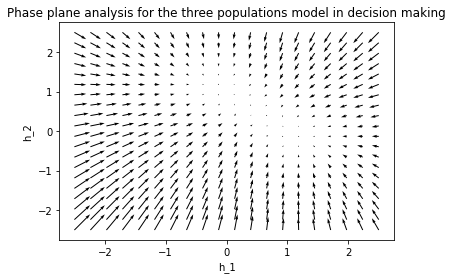

In [128]:
stim_time = 500
h = np.zeros((2,stim_time))
dt = 1e-3
tau = 10e-3 #Which value can I give ?
wee = 1.5
alpha = 1
RI1 = 0
RI2 = 01.5

def geval(hi):
  if hi>0.9:
    return 0.9
  elif hi<0.1:
    return 0.1
  else: 
    return hi

def PhasePlaneAnalysis(RI1,RI2,h10,h20):
    """
    Authors : Antoine de Comite and Florence Blondiaux
    PhasePlaneAnalysis is a function that allows to perform phase plane
    analysis
      The aim of this function is to investigate the stability of the model
      of the three populations in decision making. It has no outputs but
      represents a graph containing different pieces of information.
      ---> A vector field showing the evolution of the ODE system, the
      different vectors show toward which direction the solution is moving at any
      point of the meshgrid.
      ---> The trajectories of the solutions you've selected (starting from
      circle toward square)

    INPUTS : - RI1 is the value of the input evidence for choice 1 (supposed
              constant)  it's a scalar
            - RI2 is the value of the input evidence for choice 2 (supposed
              constant)  it's a scalar
            - y10 is the initial value of the solution along h1E axis
            (scalar)
            - y20 is a vector of initial values of the solution along the
            h2E axis (vector)

    OUTPUTS : - No outputs
    What can be modified without too much damages in this code?
    -The parameters of section 0 if you want to have a global overview of
    their influence
    - The meshgrid itself (linspaces y1 and y2, but keep the name)
    """
  
    #Phase plane analysis implementation

    y1= np.linspace(-2.5,2.5,20)
    y2 = np.linspace(-2.5,2.5,20)

    [x,y] = np.meshgrid(y1,y2)
    u= np.zeros_like(x)
    v= np.zeros_like(y)
    stim_time = 1
    for i in range(len(x)):
        for j in range(len(x)):
            Hprime = simulatePopEv(RI1,RI2,x[i,j],y[i,j], stim_time) #with default parameters
            u[i,j]= Hprime[0,1]
            v[i,j]= Hprime[1,1]
    plt.quiver(x,y,u-x,v-y,units='width') #Check if it needs to be u-x or not 
    plt.title("Phase plane analysis for the three populations model in decision making")
    plt.xlabel('h_1')
    plt.ylabel('h_2')


def simulatePopEv(RI1,RI2, h10,h20,stim_time = 500,dt = 1e-3,tau = 10e-3,wee = 1.5,alpha = 1):
    h = np.zeros((2,stim_time+1))
    h[0,0] = h10
    h[1,0] = h20
    for k in range(stim_time):
        h[0,k+1] = h[0,k] + dt/tau*(-h[0,k]+ (wee-alpha)*geval(h[0,k])-alpha*geval(h[1,k]) + RI1)
        h[1,k+1] = h[1,k] + dt/tau*(-h[1,k]+ (wee-alpha)*geval(h[1,k])-alpha*geval(h[0,k]) + RI2)
    return h

PhasePlaneAnalysis(0.75,0.75,0,0)

In [ ]:
# Lets add some inputs

Implement the system 


In [ ]:
# Widget for wonderful input

In [ ]:
# Take a decision

In [ ]:
# Speed acuracy trade off